In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
print(ad.__version__)

0.8.0


In [2]:
# results_file = '../data/processed/sc_write/'

In [22]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.figdir = '../figures/20230429/'
sc.settings.set_figure_params(dpi=80, dpi_save=300, format="eps", frameon=False)  # low dpi (dots per inch) yields small inline figures

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.5.3 pandas==1.4.2 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [14]:
adata = sc.read_h5ad("../data/sc/int_300G/cells_use_combined.h5ad")
adata

AnnData object with n_obs × n_vars = 23361 × 27517
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'subsets_Ribo_sum', 'subsets_Ribo_detected', 'subsets_Ribo_percent', 'total', 'low_lib_size', 'low_n_features', 'high_subsets_Mito_percent', 'discard', 'cell_type_leiden', 'cell_type_standalone', 'sample', 'genotype', 'treatment', 'cell_type', 'integrated_snn_res.0.8', 'cell_subtype', 'cell_id'
    obsm: 'X_pca', 'X_umap', 'X_umap.int'

In [26]:
## Subtract GDKO samples. 2023.4.29
adata = adata[adata.obs['sample'].isin(["WT PBS","WT LPS"])]

In [27]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw=adata

/Users/Ray/miniconda3/envs/SCBiology/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [28]:
marker_genes = ["Pecam1","Cldn5",  ## Endo
                "Aldh1l1","Aqp4",  ## Astro
                "Pdgfra","C1ql1",  ## OPCs
                "Mbp","Olig1",     ## Oligo
                "Neu4",             ## COPs
                "Tmem2",            ## NFOLs
                "Opalin",           ## MOL1
                "Hapln2",           ## MOL2
                "Cx3cr1", "P2ry12", ## Micro
                "Rbfox3", "Eno2",   ## Neurons
                "Slc17a7",          ## Excitatory Neurons (Vglut1)
                "Slc30a3","Otof","Rorb","Rspo1","Fezf2","Sulf1","Sla2","Foxp2","Nxph4",  ## Excitatory Neuron Subtypes
                "Gad1","Gad2",     ## Inhibitory Neurons
                "Lamp5","Lhx6","Vip","Chodl"  ## Inhibitory Neuron Subtypes
               ]
order = ["Endo","Astro","OPCs","COPs","NFOLs","MOL1","MOL2","Micro",
         "Ex-L2/3 IT","Ex-L4/5 IT","Ex-L5 IT","Ex-L5/6 NP1","Ex-L5/6 NP2","Ex-L6 IT","Ex-L6 CT","Ex-L6b",
         "Inh-Lamp5","Inh-Lhx6","Inh-Vip","Inh-Chodl"]

vln_palette = ["#F8766D","#F8766D",  ## Endo
               "#E38900","#E38900",  ## Astro
               "#C49A00","#C49A00",  ## OPCs
               "#99A800","#99A800",  ## Oligo
               "#53B400",            ## COPs
               "#00BC56",            ## NFOLs
               "#00C094",            ## MOL1
               "#00BFC4",            ## MOL2
               "#00B6EB","#00B6EB",  ## Micro
               "#06A4FF","#06A4FF",  ## Neurons
               "#A58AFF",            ## Excitatory Neurons (Vglut1)
               "#DF70F8","#DF70F8","#DF70F8","#DF70F8","#DF70F8","#DF70F8","#DF70F8","#DF70F8","#DF70F8",  ## Excitatory Neuron Subtypes
               "#FB61D7","#FB61D7",  ## Inhibitory Neurons
               "#FF66A8","#FF66A8","#FF66A8",  ## Inhibitory Neuron Subtypes
              ]
adata.obs['cell_subtype'] = adata.obs['cell_subtype'].astype('category').cat.reorder_categories(order)

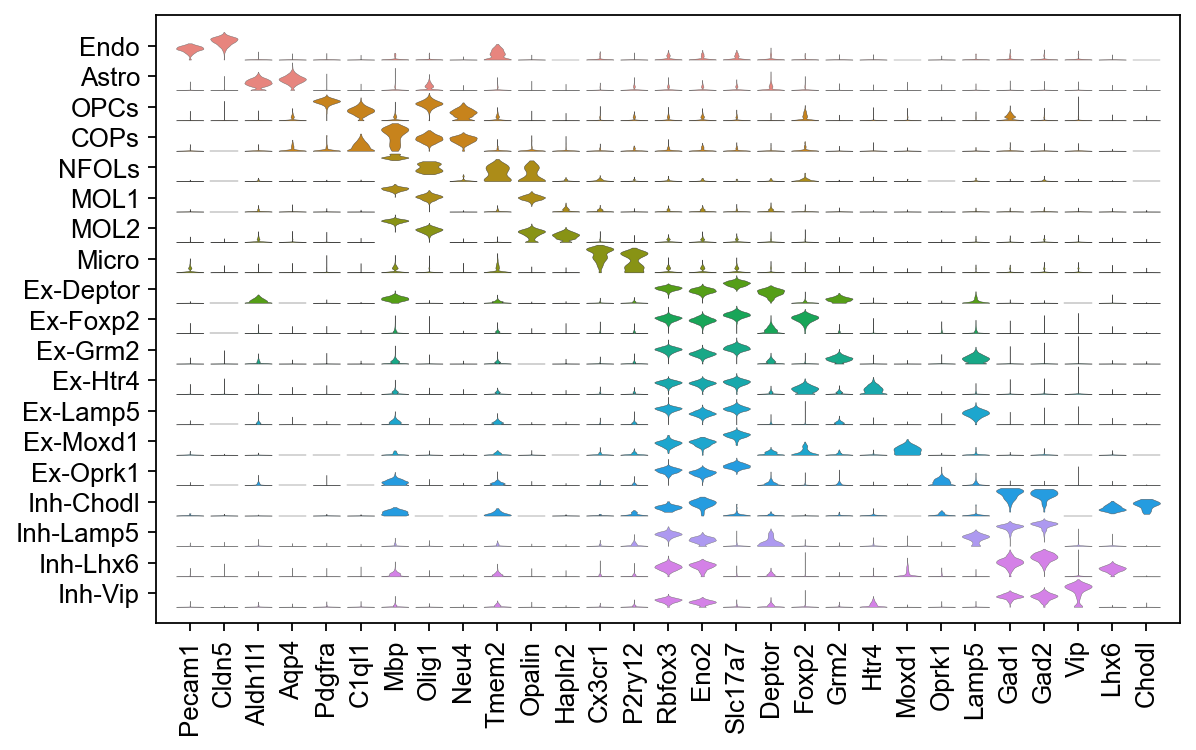

In [7]:
# sc.pl.stacked_violin(
#     adata, 
#     var_names=marker_genes, 
#     groupby="cell_subtype", 
#     yticklabels=False,
#     swap_axes=False, 
#     dendrogram=False, 
#     order=order, 
#     row_palette=vln_palette, 
#     figsize=(10,5), 
#     save="horizontal",
#     use_raw = False
# )

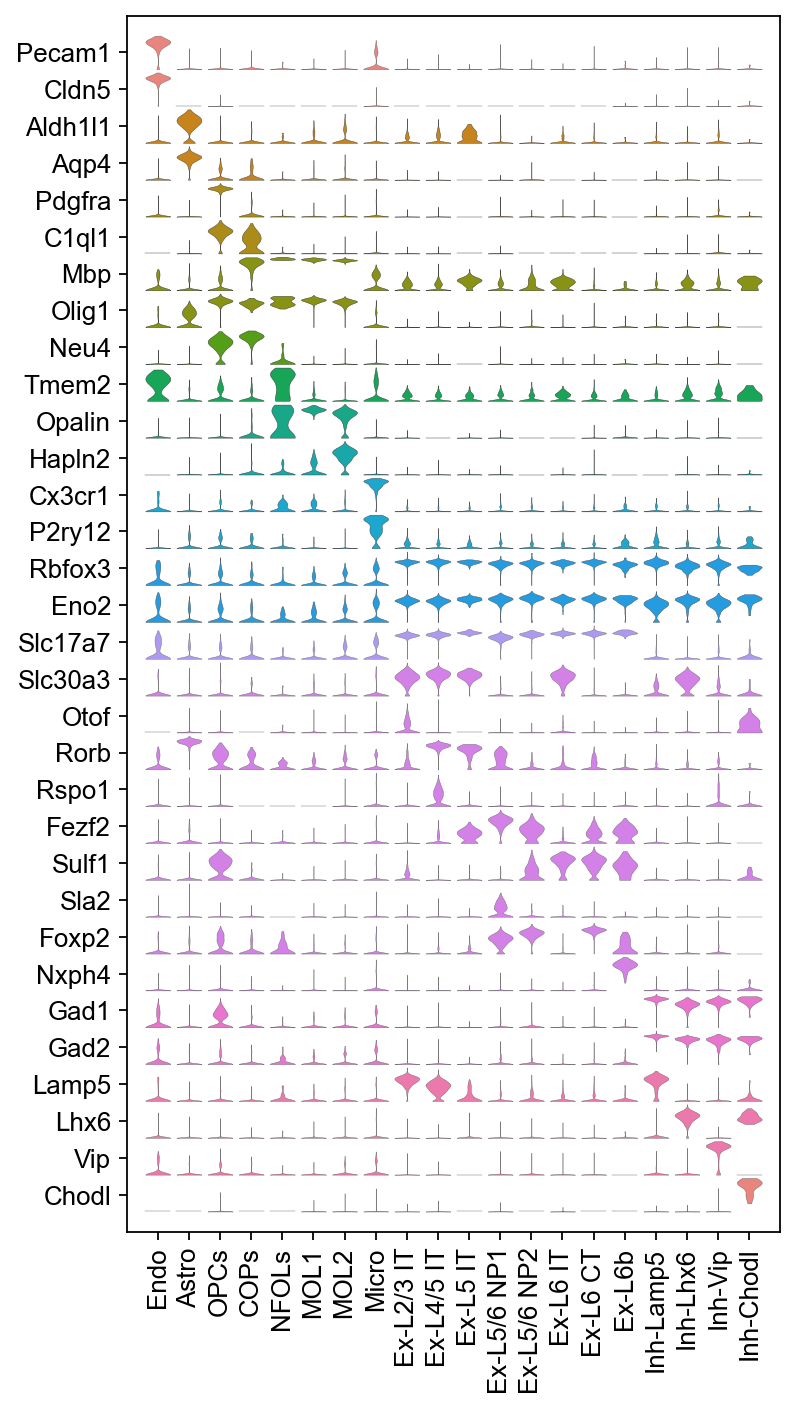

In [29]:
sc.pl.stacked_violin(
    adata, 
    var_names=marker_genes, 
    groupby="cell_subtype", 
    yticklabels=False,
    swap_axes=True, 
    dendrogram=False, 
    order=order, 
    row_palette=vln_palette, 
    figsize=(7,10), 
    save="vertical_20230429",
    use_raw = False
)